<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/k%E8%BF%91%E9%84%B0%E5%88%86%E9%A1%9E/sklearn%E5%AF%A6%E4%BD%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 手寫數字數據集實作
- 運算時間會比較久cpu(11分鐘)

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=be1722e7329a4d64b18d936090d5c1227aab4c346699f7b6c90d4fb3c1b9ce57
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 載入 MNIST 資料集
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# 資料前處理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 儲存不同 k 值的準確率
train_accuracies = []
test_accuracies = []

# 測試 k=1 到 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 計算訓練集準確率
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # 計算測試集準確率
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# 繪製準確率圖表
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="訓練集準確率")
plt.plot(range(1, 11), test_accuracies, label="測試集準確率")
plt.xlabel("k 值")
plt.ylabel("準確率")
plt.title("k 近鄰分類器準確率 (MNIST)")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

### GPU

In [6]:
!pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


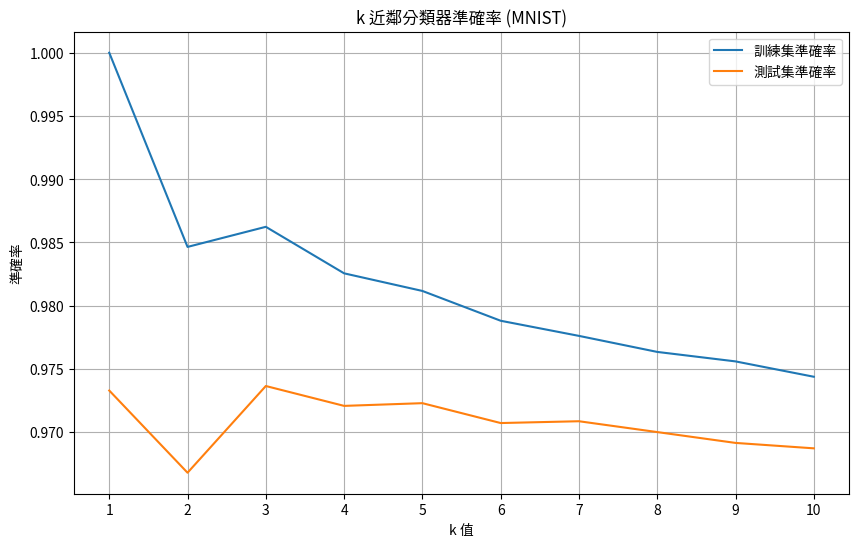

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from cuml.model_selection import train_test_split
from cuml.neighbors import KNeighborsClassifier
from cuml.metrics import accuracy_score
import cupy as cp

# 使用 scikit-learn 載入 MNIST 資料集
mnist = fetch_openml('mnist_784', version=1, as_frame=False) #  add as_frame=False to get numpy arrays
X, y = mnist["data"], mnist["target"]

# 將目標變數轉換為數值類型
y = y.astype(int)

# 資料前處理 (轉換為 cuML 能夠使用的格式)
X = cp.asarray(X) # convert to cupy array
y = cp.asarray(y) # convert to cupy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 儲存不同 k 值的準確率
train_accuracies = []
test_accuracies = []

# 測試 k=1 到 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 計算訓練集準確率
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # 計算測試集準確率
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# 繪製準確率圖表
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label="訓練集準確率")
plt.plot(range(1, 11), test_accuracies, label="測試集準確率")
plt.xlabel("k 值")
plt.ylabel("準確率")
plt.title("k 近鄰分類器準確率 (MNIST)")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()